In [1]:
import matplotlib.pyplot as plt
import pandas as pd,numpy as np
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
data = pd.read_csv(r'C:\Users\sadiq\Documents\AnalyticVidhya\Banking-Customer_Sementation\train.csv')

In [3]:
data.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [4]:
data.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [5]:
data.drop('Loan_ID',1,inplace=True)

In [6]:
data.head(10)

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
5,"4,500",2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,NaN,12,15,Male,3
6,"18,075",4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,NaN,9,12,Male,3
7,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
8,"6,300",10+ years,Rent,NaN,not verified,debt_consolidation,16.12,3,NaN,8,9,Female,3
9,"30,000",10+ years,Own,163000.0,VERIFIED - income,debt_consolidation,11.13,0,NaN,24,43,Male,1


In [7]:
data.dtypes

Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(data[['Home_Owner','Income_Verified','Purpose_Of_Loan']])
data[['Home_Owner','Income_Verified','Purpose_Of_Loan']] = imputer.transform(data[['Home_Owner','Income_Verified','Purpose_Of_Loan']])
data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,"16,000",< 1 year,Mortgage,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [9]:
data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].str.replace(',','')
data['Length_Employed'] = data['Length_Employed'].str.replace('<','')
data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,16000,1 year,Mortgage,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [10]:
data['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
 1 year      12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [12]:
data['Length_Employed'] = data['Length_Employed'].str.replace('year','')

In [14]:
data['Length_Employed'] = data['Length_Employed'].str.replace('s','')
data['Length_Employed'] = data['Length_Employed'].str.replace('+','').astype('float')
data

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,1.0,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,30000,4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725,7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,16000,1.0,Mortgage,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,17000,8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
5,4500,2.0,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,NaN,12,15,Male,3
6,18075,4.0,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,NaN,9,12,Male,3
7,15000,1.0,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
8,6300,10.0,Rent,NaN,not verified,debt_consolidation,16.12,3,NaN,8,9,Female,3
9,30000,10.0,Own,163000.0,VERIFIED - income,debt_consolidation,11.13,0,NaN,24,43,Male,1


In [15]:
print(data['Home_Owner'].value_counts())
print('********************')
print(data['Income_Verified'].value_counts())
print('********************')
print(data['Purpose_Of_Loan'].value_counts())

Mortgage    95694
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64
********************
VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64
********************
debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Gender'].head(5)

0    0
1    0
2    1
3    1
4    0
Name: Gender, dtype: int32

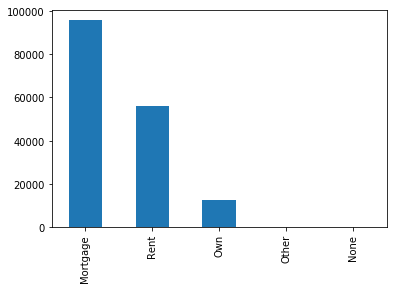

In [17]:
data['Home_Owner'].value_counts().plot(kind='bar')

In [18]:
pd.get_dummies(data['Income_Verified'], prefix='Inc')
pd.get_dummies(data['Home_Owner'], prefix='Hom')
data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,1.0,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,0,1
1,30000,4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,0,3
2,24725,7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,1,3
3,16000,1.0,Mortgage,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,1,3
4,17000,8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,0,1


In [23]:
purp = pd.get_dummies(data['Purpose_Of_Loan'], prefix='Pur')
income = pd.get_dummies(data['Income_Verified'], prefix='Inc')
home = pd.get_dummies(data['Home_Owner'], prefix='Home')

In [24]:
df = pd.concat([data, purp,income,home], axis=1)
df.drop(['Purpose_Of_Loan','Income_Verified','Home_Owner'],1,inplace=True)
df.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,...,Pur_vacation,Pur_wedding,Inc_VERIFIED - income,Inc_VERIFIED - income source,Inc_not verified,Home_Mortgage,Home_None,Home_Other,Home_Own,Home_Rent
0,7000,1.0,68000.0,18.37,0,NaN,9,14,0,1,...,0,0,0,0,1,0,0,0,0,1
1,30000,4.0,NaN,14.93,0,17.0,12,24,0,3,...,0,0,1,0,0,1,0,0,0,0
2,24725,7.0,75566.4,15.88,0,NaN,12,16,1,3,...,0,0,0,1,0,1,0,0,0,0
3,16000,1.0,56160.0,14.34,3,NaN,16,22,1,3,...,0,0,0,1,0,1,0,0,0,0
4,17000,8.0,96000.0,22.17,1,NaN,19,30,0,1,...,0,0,0,1,0,0,0,0,1,0


In [27]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].astype('float')
df.dtypes

Loan_Amount_Requested           float64
Length_Employed                 float64
Annual_Income                   float64
Debt_To_Income                  float64
Inquiries_Last_6Mo                int64
Months_Since_Deliquency         float64
Number_Open_Accounts              int64
Total_Accounts                    int64
Gender                            int32
Interest_Rate                     int64
Pur_car                           uint8
Pur_credit_card                   uint8
Pur_debt_consolidation            uint8
Pur_educational                   uint8
Pur_home_improvement              uint8
Pur_house                         uint8
Pur_major_purchase                uint8
Pur_medical                       uint8
Pur_moving                        uint8
Pur_other                         uint8
Pur_renewable_energy              uint8
Pur_small_business                uint8
Pur_vacation                      uint8
Pur_wedding                       uint8
Inc_VERIFIED - income             uint8


In [28]:
df.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate',
       'Pur_car', 'Pur_credit_card', 'Pur_debt_consolidation',
       'Pur_educational', 'Pur_home_improvement', 'Pur_house',
       'Pur_major_purchase', 'Pur_medical', 'Pur_moving', 'Pur_other',
       'Pur_renewable_energy', 'Pur_small_business', 'Pur_vacation',
       'Pur_wedding', 'Inc_VERIFIED - income', 'Inc_VERIFIED - income source',
       'Inc_not verified', 'Home_Mortgage', 'Home_None', 'Home_Other',
       'Home_Own', 'Home_Rent'],
      dtype='object')

In [30]:
imputer.fit(df[['Length_Employed','Annual_Income','Months_Since_Deliquency']])
df[['Length_Employed','Annual_Income','Months_Since_Deliquency']] = imputer.transform(df[['Length_Employed','Annual_Income','Months_Since_Deliquency']])

In [31]:
df.head(10)

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,...,Pur_vacation,Pur_wedding,Inc_VERIFIED - income,Inc_VERIFIED - income source,Inc_not verified,Home_Mortgage,Home_None,Home_Other,Home_Own,Home_Rent
0,7000.0,1.0,68000.0,18.37,0,9.0,9,14,0,1,...,0,0,0,0,1,0,0,0,0,1
1,30000.0,4.0,60000.0,14.93,0,17.0,12,24,0,3,...,0,0,1,0,0,1,0,0,0,0
2,24725.0,7.0,75566.4,15.88,0,9.0,12,16,1,3,...,0,0,0,1,0,1,0,0,0,0
3,16000.0,1.0,56160.0,14.34,3,9.0,16,22,1,3,...,0,0,0,1,0,1,0,0,0,0
4,17000.0,8.0,96000.0,22.17,1,9.0,19,30,0,1,...,0,0,0,1,0,0,0,0,1,0
5,4500.0,2.0,30000.0,10.88,1,9.0,12,15,1,3,...,0,0,0,1,0,0,0,0,0,1
6,18075.0,4.0,85000.0,5.65,0,9.0,9,12,1,3,...,0,0,1,0,0,0,0,0,0,1
7,15000.0,1.0,115000.0,7.97,1,16.0,25,31,0,2,...,0,0,1,0,0,0,0,0,0,1
8,6300.0,10.0,60000.0,16.12,3,9.0,8,9,0,3,...,0,0,0,0,1,0,0,0,0,1
9,30000.0,10.0,163000.0,11.13,0,9.0,24,43,1,1,...,0,0,1,0,0,0,0,0,1,0


In [33]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df[['Loan_Amount_Requested','Annual_Income','Debt_To_Income']] = std.fit_transform(df[['Loan_Amount_Requested','Annual_Income','Debt_To_Income']])

In [35]:
X = df.drop('Interest_Rate',1)
y = df['Interest_Rate']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
log_reg = LogisticRegression(random_state=1992)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.49052813219694846
              precision    recall  f1-score   support

           1       0.51      0.14      0.22      8474
           2       0.48      0.68      0.57     17549
           3       0.57      0.54      0.56     15055

    accuracy                           0.52     41078
   macro avg       0.52      0.45      0.45     41078
weighted avg       0.52      0.52      0.49     41078



In [39]:
from imblearn.over_sampling import RandomOverSampler
sample = RandomOverSampler(random_state=1992)
# fit_sample on training data
X_sample, y_sample = sample.fit_sample(X_train, y_train)
log_reg.fit(X_sample, y_sample)
y_pred = log_reg.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.45426297980896796
              precision    recall  f1-score   support

           1       0.35      0.60      0.44      8474
           2       0.51      0.27      0.35     17549
           3       0.55      0.62      0.58     15055

    accuracy                           0.47     41078
   macro avg       0.47      0.50      0.46     41078
weighted avg       0.49      0.47      0.45     41078



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [41]:
rf_sample = RandomForestClassifier(random_state=1993)
# fit model on training data
rf_sample.fit(X_train, y_train)
#predicting on test data
y_pred = rf_sample.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.503358657996196
              precision    recall  f1-score   support

           1       0.48      0.25      0.33      8474
           2       0.49      0.61      0.54     17549
           3       0.56      0.55      0.56     15055

    accuracy                           0.51     41078
   macro avg       0.51      0.47      0.48     41078
weighted avg       0.51      0.51      0.50     41078



In [42]:
from sklearn.naive_bayes import MultinomialNB
#Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [47]:
y_train[(y_train < 0).all()]

KeyError: False

In [48]:
from sklearn.svm import LinearSVC

#Linear SVM Model
lsvm = LinearSVC(random_state=1992)

lsvm.fit(X_train, y_train)

y_pred = lsvm.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.44449307076941885
              precision    recall  f1-score   support

           1       0.39      0.00      0.00      8474
           2       0.48      0.62      0.54     17549
           3       0.53      0.64      0.58     15055

    accuracy                           0.50     41078
   macro avg       0.47      0.42      0.37     41078
weighted avg       0.48      0.50      0.44     41078



C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(base_estimator = log_reg, random_state = 1992)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

C:\Users\sadiq\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\sadiq\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


0.5311772919657216
              precision    recall  f1-score   support

           1       0.53      0.28      0.36      8474
           2       0.50      0.64      0.56     17549
           3       0.60      0.58      0.59     15055

    accuracy                           0.54     41078
   macro avg       0.54      0.50      0.50     41078
weighted avg       0.54      0.54      0.53     41078



In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(base_estimator = log_reg, random_state = 1992)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.4807730888942365
              precision    recall  f1-score   support

           1       0.52      0.12      0.19      8474
           2       0.48      0.70      0.57     17549
           3       0.57      0.52      0.54     15055

    accuracy                           0.51     41078
   macro avg       0.52      0.44      0.43     41078
weighted avg       0.52      0.51      0.48     41078



In [51]:
from sklearn.ensemble import BaggingClassifier

# Code starts here
bagging_clf = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators = 100, max_samples = 100, random_state=1993)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

0.475483643082008
              precision    recall  f1-score   support

           1       0.53      0.09      0.15      8474
           2       0.48      0.71      0.57     17549
           3       0.58      0.52      0.55     15055

    accuracy                           0.51     41078
   macro avg       0.53      0.44      0.42     41078
weighted avg       0.52      0.51      0.48     41078



In [52]:
from mlxtend.classifier import StackingClassifier

classifier1 = RandomForestClassifier(random_state=1993)
classifier2= LogisticRegression(random_state=1993)
classifier3 = LinearSVC(random_state=1993)
#classifier4= MultinomialNB()
classifier_list=[classifier1,classifier2,classifier3]

m_classifier=LogisticRegression(random_state=1992)

# Code starts here
sclf = StackingClassifier(classifiers = classifier_list, meta_classifier = m_classifier)

sclf.fit(X_train, y_train)

y_pred = sclf.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.503358657996196
              precision    recall  f1-score   support

           1       0.48      0.25      0.33      8474
           2       0.49      0.61      0.54     17549
           3       0.56      0.55      0.56     15055

    accuracy                           0.51     41078
   macro avg       0.51      0.47      0.48     41078
weighted avg       0.51      0.51      0.50     41078

